## PREDICTION OF ALCOHOL LEVEL BASED ON CHEMICAL PROPERTIES OF THE WHITE WINE (REGRESSION)

# Importing the dataset


The code asks to replace the files, you kust might answer no

In [1]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality-white.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Reading the data


I just need the white wine data. There is also a red wine file, but it is not a part of my project

In [2]:
import pandas as pd
white_wine_df = pd.read_csv('winequality-white.csv', delimiter= ';')
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


You can see delimiter inserted in the code line, without it the table looks crooked

In [24]:
# Display statistical summary of the DataFrame
white_wine_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [25]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Installing PYCARET

In [ ]:
!pip install pycaret[full]

In [4]:
from pycaret.regression import *

In [5]:
exp_reg = setup(white_wine_df, target='alcohol')

,Description,Value
0,Session id,1586
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Installing models allowing for extra regression models like catboost into the comparison of the models

In [ ]:
pip install pycaret[models]

In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2286,0.0978,0.3120,0.9358,0.0269,0.0217,3.8280
lightgbm,Light Gradient Boosting Machine,0.2393,0.1062,0.3249,0.9305,0.0281,0.0228,0.4930
xgboost,Extreme Gradient Boosting,0.2300,0.1138,0.3364,0.9256,0.0289,0.0218,0.3550
et,Extra Trees Regressor,0.2302,0.1279,0.3571,0.9163,0.0307,0.0217,1.2780
rf,Random Forest Regressor,0.2496,0.1315,0.3615,0.9141,0.0310,0.0235,2.4890
gbr,Gradient Boosting Regressor,0.3039,0.1592,0.3985,0.8957,0.0346,0.0290,0.5450
lr,Linear Regression,0.3080,0.2426,0.4576,0.8413,0.0365,0.0296,1.5300
br,Bayesian Ridge,0.3082,0.2427,0.4577,0.8413,0.0366,0.0297,0.1200
dt,Decision Tree Regressor,0.3293,0.2799,0.5277,0.8172,0.0454,0.0311,0.0480
ada,AdaBoost Regressor,0.4754,0.3330,0.5768,0.7817,0.0507,0.0464,0.2770


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
# Get information about all available metrics
metrics_info = get_metrics()
print(metrics_info)


        Name Display Name                                     Score Function  \
ID                                                                             
mae      MAE          MAE   <function mean_absolute_error at 0x7fa5f1e7a7a0>   
mse      MSE          MSE    <function mean_squared_error at 0x7fa5f1e7a950>   
rmse    RMSE         RMSE    <function mean_squared_error at 0x7fa5f1e7a950>   
r2        R2           R2              <function r2_score at 0x7fa5f1e7ac20>   
rmsle  RMSLE        RMSLE  <function RMSLEMetricContainer.__init__.<local...   
mape    MAPE         MAPE  <function MAPEMetricContainer.__init__.<locals...   

                                                  Scorer Target  \
ID                                                                
mae                              neg_mean_absolute_error   pred   
mse                               neg_mean_squared_error   pred   
rmse                         neg_root_mean_squared_error   pred   
r2                      

In [8]:
# Create a specific regression model (CatBoost regression)
catboost_model = create_model('catboost')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2186,0.0866,0.2942,0.9439,0.0257,0.0210
1,0.2156,0.0794,0.2817,0.9434,0.0249,0.0209
2,0.2364,0.1075,0.3279,0.9257,0.0282,0.0224
3,0.2343,0.0969,0.3113,0.9391,0.0265,0.0220
4,0.2331,0.0890,0.2983,0.9473,0.0256,0.0220
5,0.2378,0.1033,0.3214,0.9377,0.0278,0.0225
6,0.2399,0.1088,0.3299,0.9292,0.0284,0.0227
7,0.2290,0.1025,0.3202,0.9249,0.0283,0.0221
8,0.2167,0.0803,0.2833,0.9471,0.0243,0.0204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
# Tune hyperparameters of the model
tuned_dt_model = tune_model(catboost_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2194,0.0919,0.3032,0.9404,0.0265,0.0210
1,0.2113,0.0779,0.2791,0.9444,0.0246,0.0204
2,0.2479,0.1205,0.3472,0.9167,0.0299,0.0235
3,0.2224,0.0955,0.3090,0.9400,0.0263,0.0209
4,0.2328,0.0908,0.3014,0.9462,0.0258,0.0219
5,0.2405,0.1119,0.3345,0.9325,0.0287,0.0227
6,0.2359,0.1158,0.3403,0.9247,0.0291,0.0223
7,0.2225,0.0962,0.3102,0.9295,0.0273,0.0214
8,0.2195,0.0855,0.2924,0.9437,0.0250,0.0207


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Cross validation score is 0.9358

This metrics info reminds what all the abbreviations mean

#Evaluating the model

I do not need many plots but only specific ones. Running a line "evaluate_model(catboost_model) gives many visual representations of the model but it increased the running time immensly for me. Thus, I selected plots I am more interested in, like a scatter plot of residuals against predicted values, helping me assess the model's fit for the variance of the data and identify patterns in the residuals

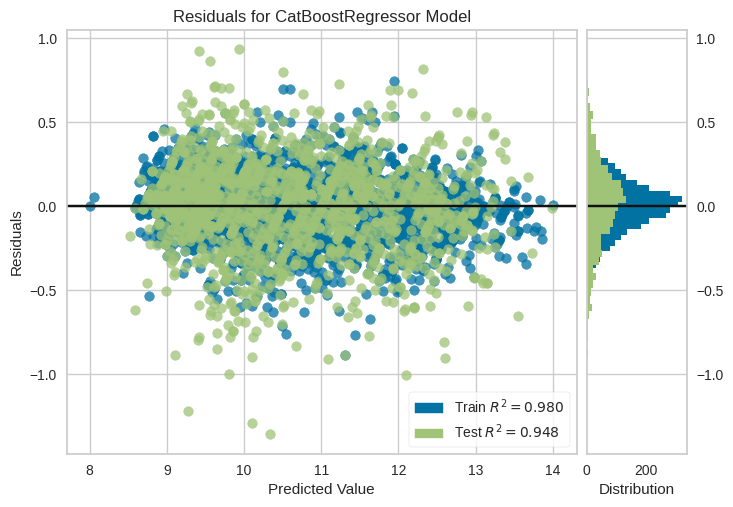

In [ ]:
# Plot Residuals
plot_model(catboost_model, plot='residuals')


I could adjust the scale but there is no necessity. Points scattered around the horizontal line at 0 indicate good model performance. The deviation from the horizontal line suggests that the model has room for improvement. I did use tune function however, the search for better hypoparameters did not yeild better metrics values so I left the model how it is.

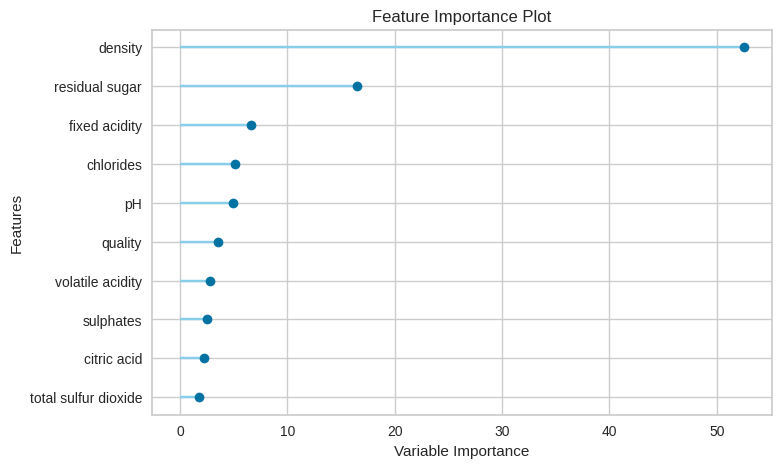

In [ ]:
plot_model(catboost_model, plot='feature')

Density and residual sugar was also very important features for the models in the literature sources as well.

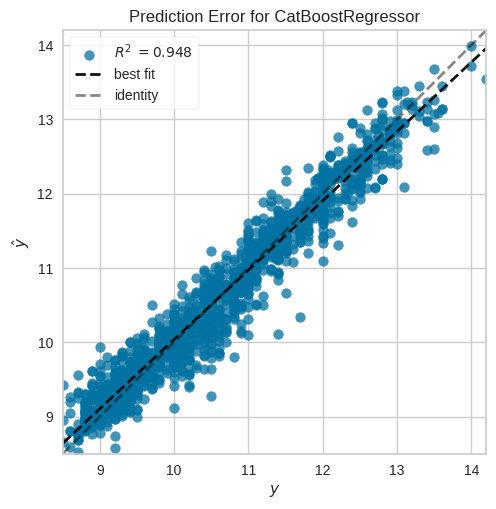

In [ ]:
# plot error
plot_model(catboost_model, plot = 'error')

Points on the Identity Line are Ideal scenario where the predicted values perfectly match the actual values. Points Clustered Around Identity Line show a Good model performance and predictions are close to actual values.Some Points Spread Above or Below Identity Line Indicating some bias in predictions (overestimation or underestimation), but this bias is minimal.

In [11]:
final_model = finalize_model(catboost_model)

#Trying traditional linear regression

This is the most popular regression model and simple one. I just wanted to check how far the linear regression is behind the boosting models

In [16]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Create training and test sets

X = white_wine_df.drop("alcohol",1)   #Feature Matrix
y = white_wine_df["alcohol"]          #Target Variable

# 30% test, 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)


# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.903959856064359
Root Mean Squared Error: 0.3846678629052785


R squared value is 0.903959856064359. Differs from the value from the pycaret because pycaret yeilds score after 10-cross validation and gives the mean value after everaging all the runs.

In [17]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 10-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=10)

# Print the 10-fold cross-validation scores
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Standard Deviation of 10-Fold CV Score: {}".format(np.std(cv_scores)))

[0.85127181 0.87562809 0.859825   0.81920177 0.88014088 0.45183682
 0.92320839 0.9222018  0.93520337 0.90519642]
Average 10-Fold CV Score: 0.8423714346078756
Standard Deviation of 10-Fold CV Score: 0.13470068608982239


According to the pycaret library, Linear regression model yeilds average 10-cross R squered value of 0.84. scikit learn is 0.84. However, R squered value (regression score is higher - 0.90) given reg.score function.

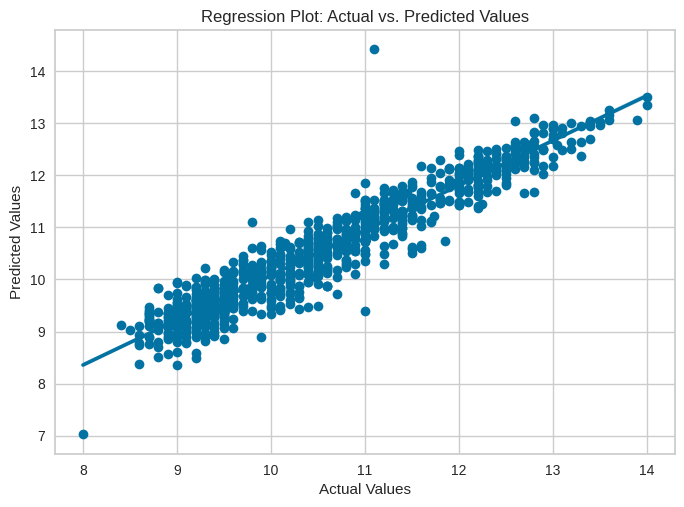

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':1})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted Values")
plt.show()


points mostly form a diagonal line, indicating a strong correlation between actual and predicted values. Some points deviate from the line, suggesting that the model is not accurately capturing only some the patterns in the data.

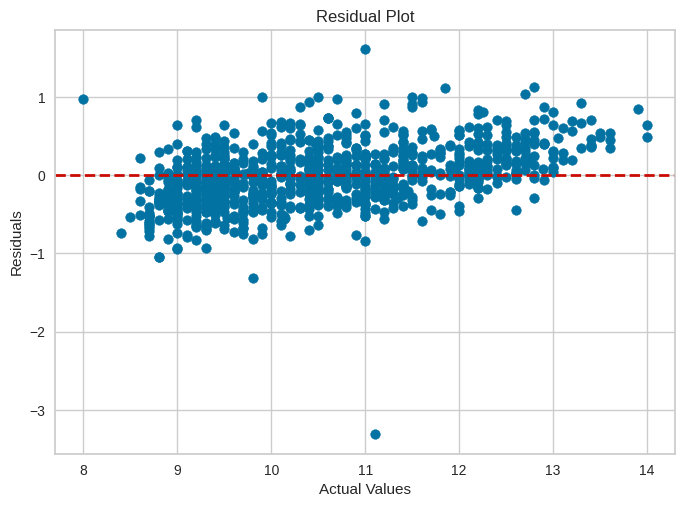

In [20]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

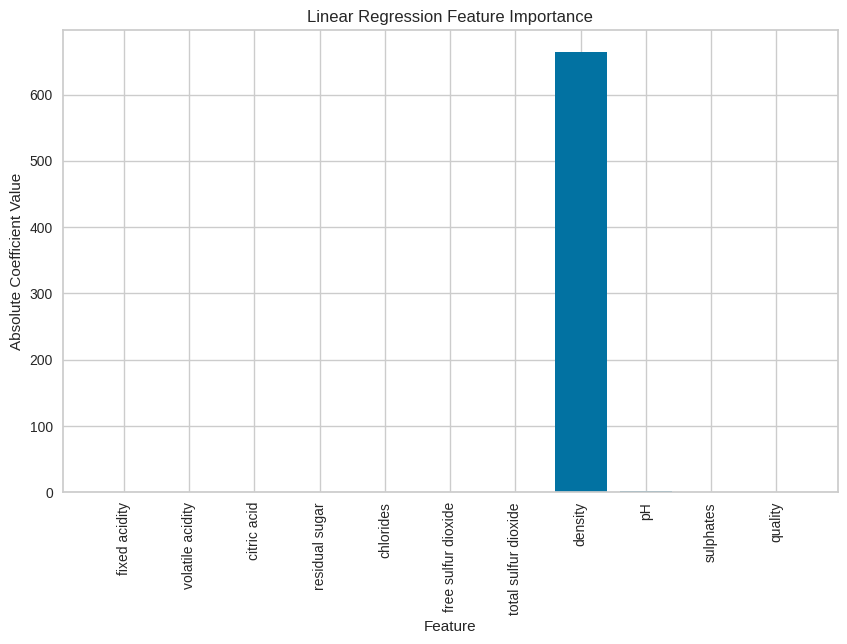

In [23]:
# Get feature names from your dataset
feature_names = X.columns

# Get the coefficients of the features
coefficients = reg_all.coef_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), np.abs(coefficients))
plt.xticks(range(len(feature_names)), feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Linear Regression Feature Importance')
plt.show()

Linear regression also shows DENSITY feature as the most prominent atribute in predicting alcohol level of the wine. Accorfing to other literature sources, alcohol as attribute contributes sugnificantly in the wine quality desicion process making these features interconnected and potentially important for winemakers to optimize the vinification procedure.  